In [76]:
import json
from qutip import *
import numpy as np
import scipy
import cmath
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import itertools
from numpy.random import seed
from numpy.random import rand
from itertools import product
from scipy.misc import derivative
from scipy import optimize
from functools import wraps
from time import time
from scipy.optimize import minimize
from matplotlib import gridspec


In [77]:
engErr = []
stateErr = []
time = []
lengths = []

In [79]:
for i in range(5):
    for j in range(10):
        N = i + 2
        M = j + 1
        dataLocation = 'Data/May21/N'+ str(N) +'M' +str(M) +'.json'
        saved = []
        with open(dataLocation) as file:
            for line in file:
                saved.append(json.loads(line))

        cgdTime,cgdEngErr,cgdStateErr,edTime,length = saved
        engErr.append(cgdEngErr)
        stateErr.append(cgdStateErr)
        time.append(edTime)
        lengths.append(length)
        

FileNotFoundError: [Errno 2] No such file or directory: 'Data/May21/N3M6.json'

Text(0, 0.5, 'Runtime')

<Figure size 576x396 with 0 Axes>

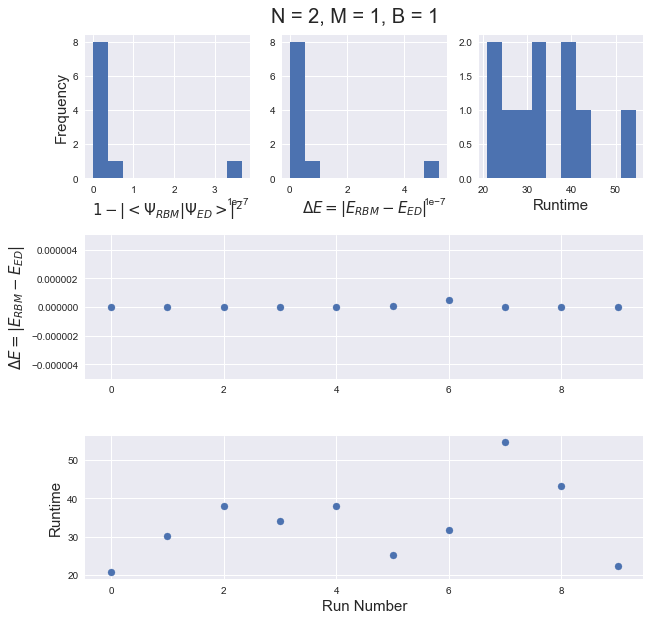

In [49]:
##ONE 
hisIt= np.arange(hisIntlen)
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("N = 2, M = 1, B = 1",size =20)
gs = gridspec.GridSpec(ncols=3, nrows=3, hspace = 0.4)
ttl.set_position([.5, 0.92])



ax1 = plt.subplot(gs[0, 0])
ax1 .hist(cgdStateErr, bins=10) 
ax1 .set_xlabel("$1-|<\Psi_{RBM}|\Psi_{ED}>|^2$",size = 15)
ax1.set_ylabel("Frequency",size = 15)



ax2 = plt.subplot(gs[0, 1])
ax2.hist(cgdEngErr, bins=10) 
ax2.set_xlabel("$\Delta E = |E_{RBM}-E_{ED}|$",size = 15)



ax3 = plt.subplot(gs[0, 2])
ax3.hist(cgdTime, bins=10) 
ax3.set_xlabel("Runtime",size = 15)


ax4 = plt.subplot(gs[1, :])
ax4.scatter(hisIt,cgdEngErr) 
ax4.set_ylim([-0.000005,0.000005])
ax4 .set_ylabel("$\Delta E = |E_{RBM}-E_{ED}|$", size = 15)


ax5 = plt.subplot(gs[2, :])
ax5.scatter(hisIt,cgdTime)  
ax5.set_xlabel("Run Number",size = 15)
ax5 .set_ylabel("Runtime", size = 15)












In [50]:
avEngErr = np.sum(cgdEngErr)/(len(hisIt))
avStateErr = np.sum(cgdStateErr)/(len(hisIt))
avRunTime = np.sum(cgdTime)/(len(hisIt))
print('Average Energy Error: ', avEngErr )
print('Average Ground State Error: ', avStateErr )
print('Average Run Time: ', avRunTime )

cutOff = 0.0001
runsCutOff = sum(i>cutOff for i in cgdEngErr)
prob = (runsCutOff/100)
print("Number of runs abover 0.0001 error:", runsCutOff )
print("Prob of sucess:",  f"{1-prob:.4f}" )
print("Prob of sucess two runs:", f"{1-prob**2:.4f}" )
print("Prob of sucess three runs:", f"{1-prob**3:.4f}" )




Average Energy Error:  6.437096562450506e-08
Average Ground State Error:  4.433163312000943e-08
Average Run Time:  33.83503904342651
Number of runs abover 0.0001 error: 0
Prob of sucess: 1.0000
Prob of sucess two runs: 1.0000
Prob of sucess three runs: 1.0000


In [72]:
avEngErr = []
avStateErr = []
avRunTime = []
for i in range(len(engErr)):
    avEngErrTemp = np.sum(engErr[i])/(lengths[i])
    avEngErr.append(avEngErrTemp)
    avStateErrTemp = np.sum(stateErr[i])/(lengths[i])
    avStateErr.append(avStateErrTemp)
    avRunTimeTemp = np.sum(time[i])/(lengths[i])
    avRunTime.append(avRunTimeTemp)





<Figure size 576x396 with 0 Axes>

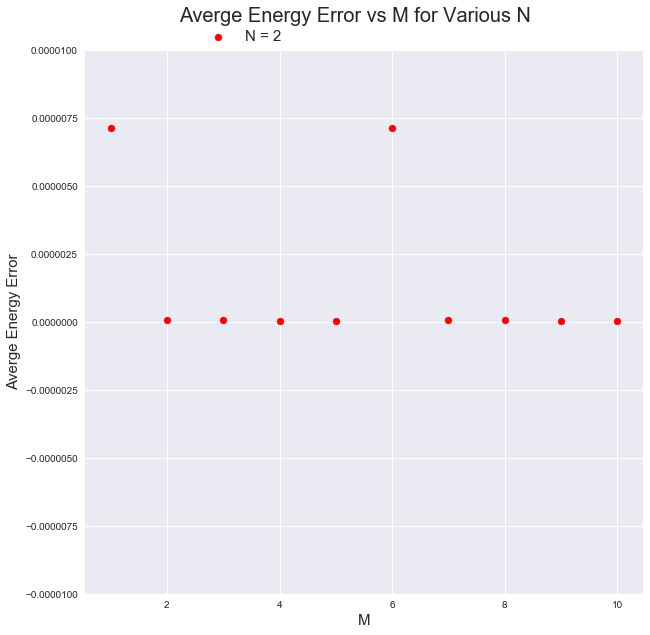

In [75]:
x = np.arange(1,11)
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("Averge Energy Error vs M for Various N",size =20)
gs = gridspec.GridSpec(ncols=1, nrows=1, hspace = 0.4)
ttl.set_position([.5, 0.94])


ax4 = plt.subplot(gs[0, :])
#ax4.set_yscale('log')
ax4.set_ylim([-0.00001,0.00001])
ax4.scatter(x,avEngErr[0:10], color='r',label='N = 2') 
#ax4.scatter(x,avEngErr[5:10],color='b',label='N = 3') 
#ax4.scatter(x,avEngErr[10:15], color='g',label='N = 4') 
ax4 .set_ylabel("Averge Energy Error", size = 15)
ax4.set_xlabel("M",size = 15)
plt.legend(loc = (0.2, 1),fontsize = 15,ncol=3)